In [1]:
import community
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import os
import powerlaw
import pandas as pd
import urllib.request
import requests
from urllib.parse import quote
from fa2 import ForceAtlas2
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})

In [2]:
# Functin to download file from github
def file_exist(file_name):
    return file_name in os.listdir(os.getcwd())
def download_file(url,file_name):
    if file_exist(file_name):
        return
    response = requests.get(url)
    open(file_name, "wb").write(response.content)

In [3]:
# Load the dataset from git
url = "https://raw.githubusercontent.com/sifat-e-noor/Project-assignment-A-Movie-dataset-/main/movies.csv"
download_file(url,"movies.csv")
# Create movies dataframe
df_movie = pd.read_csv("movies.csv")
# df_movie.head(10)

In [4]:
# Load the dataset from git
url = "https://raw.githubusercontent.com/sifat-e-noor/Project-assignment-A-Movie-dataset-/main/ratings.csv"
download_file(url,"ratings.csv")
# Create ratings dataframe
df_ratings = pd.read_csv("ratings.csv")
df_ratings.head(10)
# Pick only userId from df_ratings
df_ratings_onlyuserid = df_ratings.drop(df_ratings.loc[:, 'movieId':'timestamp'].columns, axis=1)
df_ratings_onlyuserid

,userId
0,1
1,1
2,1
3,1
4,1
...,...
100831,610
100832,610
100833,610
100834,610


In [5]:
# len(movieId_from_tags)

In [6]:
# len(movieId_from_ratings)

In [7]:
# Load the dataset from git
url = "https://raw.githubusercontent.com/sifat-e-noor/Project-assignment-A-Movie-dataset-/main/links.csv"
download_file(url,"links.csv")
# Create links dataframe
df_links = pd.read_csv("links.csv")
# df_links.head(10)

In [8]:
# Load the dataset from git
url = "https://raw.githubusercontent.com/sifat-e-noor/Project-assignment-A-Movie-dataset-/main/tags.csv"
download_file(url,"tags.csv")
# Create tags dataframe
df_tags = pd.read_csv("tags.csv")
df_tags.head(10)
# Pick only userId from df_tags
df_tags_onlyuserid = df_tags.drop(df_tags.loc[:, 'movieId':'timestamp'].columns, axis=1)
df_tags_onlyuserid

,userId
0,2
1,2
2,2
3,2
4,2
...,...
3678,606
3679,606
3680,610
3681,610


In [9]:
# Merge df_ratings and df_tags
df_frames = [df_ratings_onlyuserid, df_tags_onlyuserid]  
df_frames = pd.concat(df_frames)

# Find unique userId(s) from df_frames 
df_unique_userId = df_frames['userId'].unique()
# df_unique_userId
# print(f"Unique userId(s) from ratings and tags dataframes: \n {df_frames['userId'].unique()}")

In [10]:
# Get movieId for each unique userId from df_tags and df_ratings

dict_moviedId = {}
def user_watched_movie(userId): 
    movieId_from_ratings = df_ratings["movieId"].where(df_ratings["userId"]==userId).dropna()
    movieId_from_tags = df_ratings["movieId"].where(df_ratings["userId"]==userId).dropna()
    data = [ movieId_from_ratings, movieId_from_tags]
    df_user_watched_movies = set(pd.concat(data, axis = 0))
    return df_user_watched_movies

for userId in df_unique_userId:
    dict_moviedId[userId] = user_watched_movie(userId)

In [11]:
len(dict_moviedId[1])

232

In [12]:
# Create users_watched_common_movies graph (denotes with G) and add userId(s) as nodes 
G = nx.Graph()
G.add_nodes_from(df_unique_userId)
G.number_of_nodes()

610

In [13]:
# Find out the edges
dict_moviedId_keys = list(dict_moviedId.keys())
for i in range(0, len(dict_moviedId_keys)):
    for j in range(i+1, len(dict_moviedId_keys)):
        node1 = dict_moviedId_keys[i]
        node2 = dict_moviedId_keys[j]
        common_movies = dict_moviedId[node1].intersection(dict_moviedId[node2])
        if len(common_movies) > 0:
#             print("edge exist")
            G.add_edge(node1, node2, common_movies = str(common_movies)) 
#         print(common_movies)

In [14]:
# View nodes and edges data/attributes
# G.edges.data()

In [15]:
# Print the no. of nodes and edges of users_watched_common_movies
print("Nodes:",G.number_of_nodes(), " edges:", G.number_of_edges())

Nodes: 610  edges: 164054


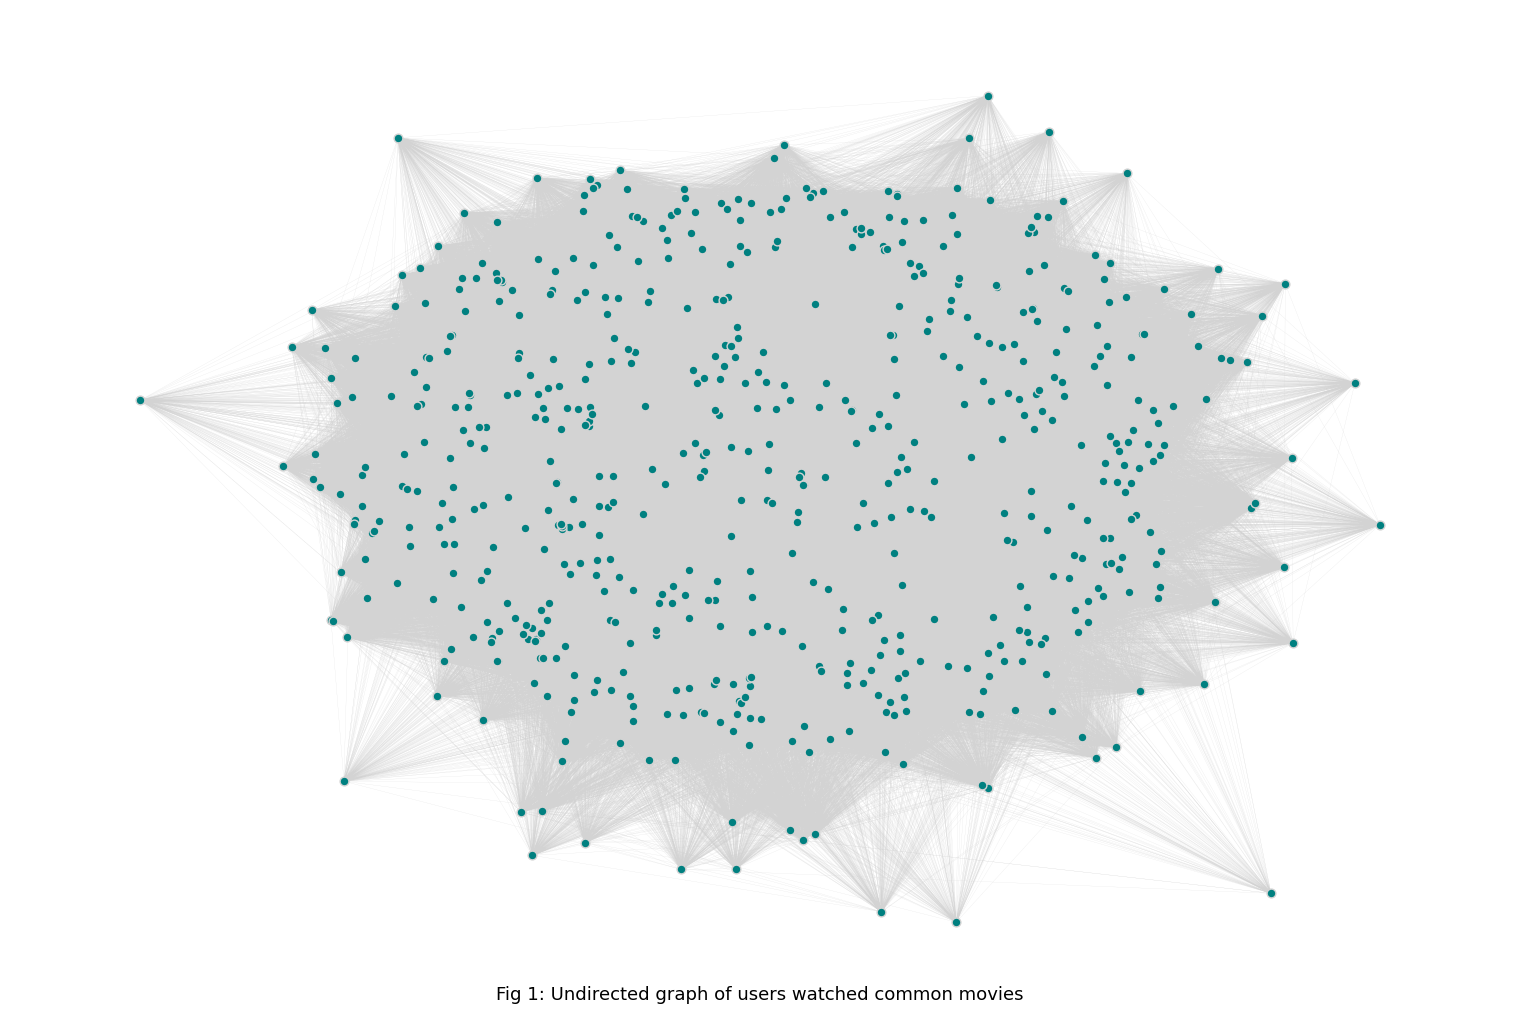

In [16]:
# Draw the undirected graph of users_watched_common_movies universe
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_color='teal', edge_color='lightgray', edgecolors='lightgray', node_size=40, width=.1, with_labels=False)
plt.figtext(0.5, 0.01,'Fig 1: Undirected graph of users watched common movies', wrap=True, horizontalalignment='center', fontsize=13) 
plt.show()

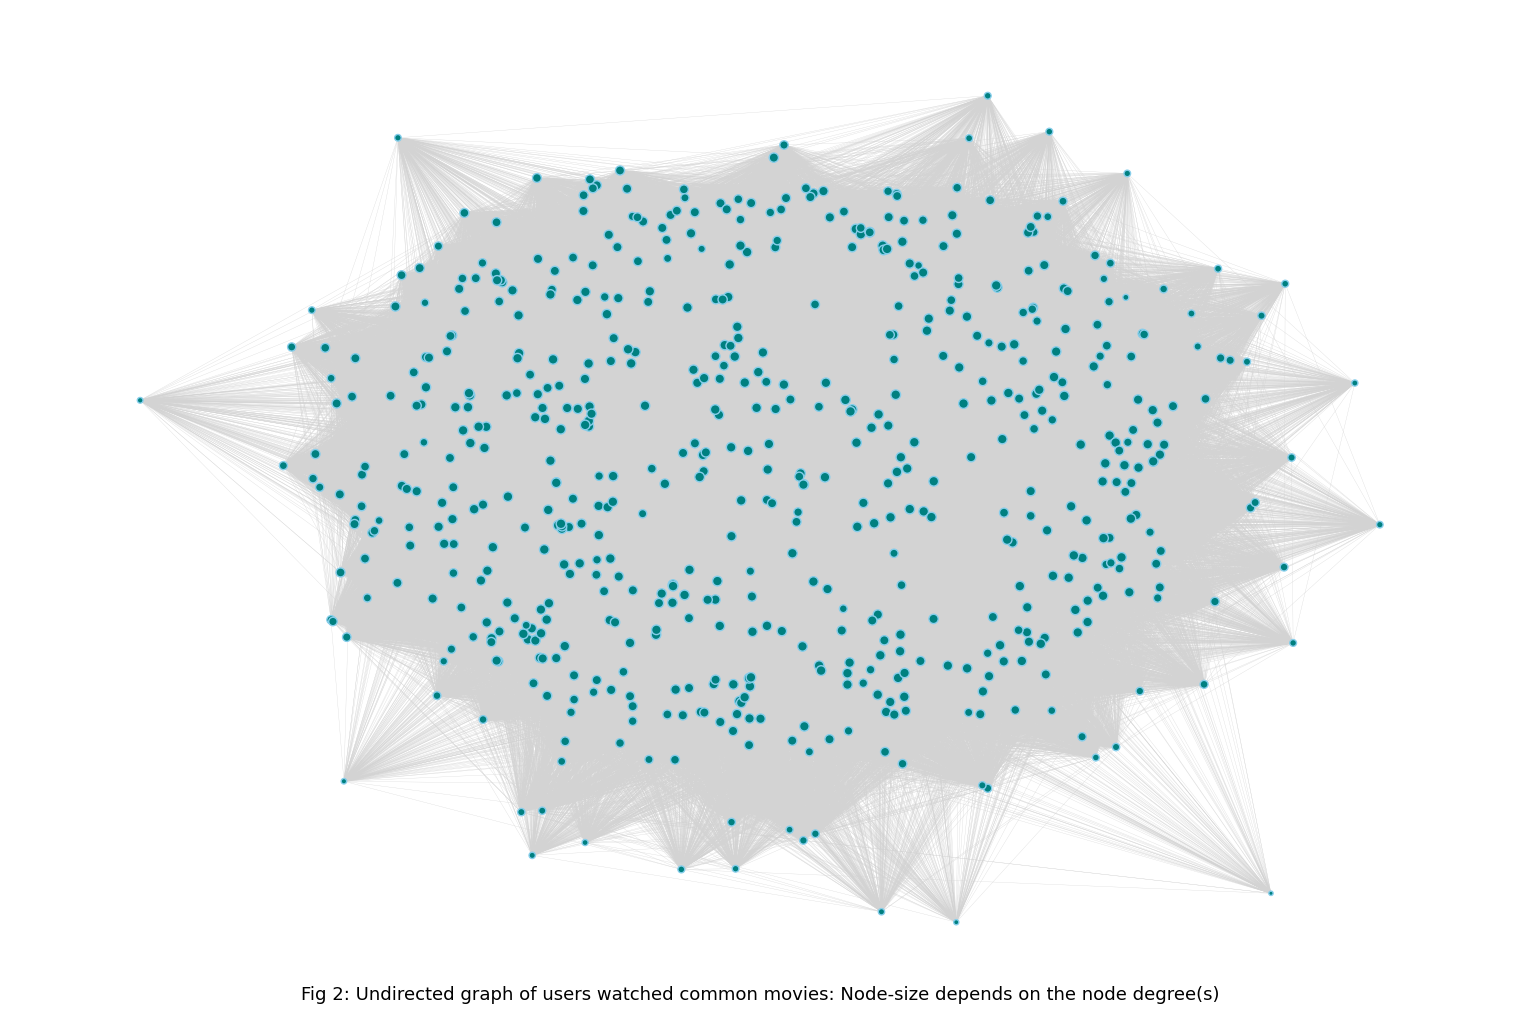

In [17]:
# Draw the undirected graph of users_watched_common_movies universe where node-size depends on the node degree
dict_G_degree = dict(G.degree)
nx.draw(G, pos=pos, edge_color='lightgray',edgecolors='skyblue', node_color="teal", with_labels=False, nodelist=list(dict_G_degree.keys()), node_size=[v * .08 for v in list(dict_G_degree.values())], width=.2)
plt.figtext(0.5, 0.01,'Fig 2: Undirected graph of users watched common movies: Node-size depends on the node degree(s)', wrap=True, horizontalalignment='center', fontsize=13) 
plt.show()

In [18]:
# Find users_watched_common_movies universe communities
users_watched_common_movies_communities = nx_comm.louvain_communities(G, seed=123)

# Count the communities of Marvel universe
print(f"The users watched common movies universe has {len(users_watched_common_movies_communities)} communities. \n")


The users watched common movies universe has 3 communities. 



100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 155.97it/s]


BarnesHut Approximation  took  0.23  seconds
Repulsion forces  took  0.65  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.34  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


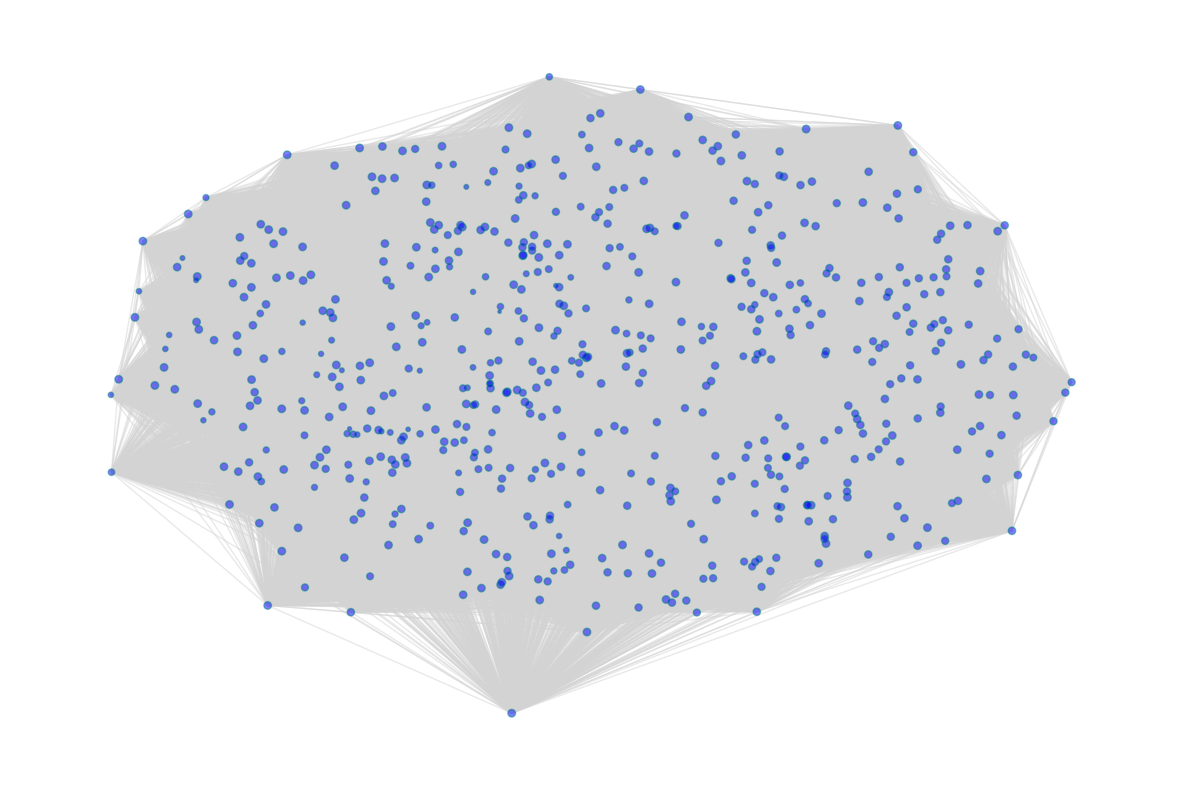

<Figure size 60000x60000 with 0 Axes>

In [19]:
# Plot the undirected graph of users_watched_common_movies universe using the Force Atlas algorithm
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=True,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=0.000001,
                          strongGravityMode=False,
                          gravity=0.000001,

                          # Log
                          verbose=True)

dict_G_degree_1 = dict(G.degree)
positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=200)
nx.draw_networkx(G, positions, node_size=[v * .05 for v in dict_G_degree_1.values()], edge_color='lightgray', edgecolors='teal', with_labels=False, alpha=0.5, node_color="blue")
plt.axis('off')
plt.figure(3,figsize=(1000,1000), dpi=60) 
plt.figtext(0.5, 0.01,'Fig 3: Visual of undirected graph of users watched common movies universe using Force Atlas', wrap=True, horizontalalignment='center', fontsize=13) 
plt.show()

In [20]:
# Create a directed graph form G for degree distributions 
Dig_grapgh = G.to_directed()

In [21]:
# Plotting the degree distribution of the network

def plot_d(Dig_grapgh, scale='lin', alpha=1, colour='black'):
    
    num_nodes = Dig_grapgh.number_of_nodes()
    m_degree = 0
    
    for n in Dig_grapgh.nodes():
        if Dig_grapgh.degree(n) > m_degree:
            m_degree = Dig_grapgh.degree(n)
#    print(maximum_degree)

    x = []
    y_ = []
    
    for j in range(m_degree + 1):
        x.append(j)
        y_.append(0)
        for n in Dig_grapgh.nodes():
            if Dig_grapgh.degree(n) == j:
                y_[j] += 1
        y = [j / num_nodes for j in y_] 
    
    
    # Plotting the degree distributions for the network using linear and log-log axes.
    
    #linear
    if scale == 'linear':
        plt.xscale('linear')
        plt.yscale('linear')
        plt.ylabel('count')
        plt.xlabel('k')
        plt.figtext(0.5, 0.07,'Fig 4: Degree distribution - linear scale', wrap=True, horizontalalignment='center', fontsize=12)
        plt.plot(x, y, linewidth = 0, marker = '.', markersize = 10, color = 'slategrey', alpha = alpha)
    
    #log
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.ylabel('count')
        plt.xlabel('k')
        plt.figtext(0.5, 0.07,'Fig 5: Degree distribution - log scale', wrap=True, horizontalalignment='center', fontsize=12)
        plt.plot(x, y, linewidth = 0, marker = '.', markersize = 10, color = 'slategrey', alpha = alpha)
        
    else:
        pass
    
    plt.show()    

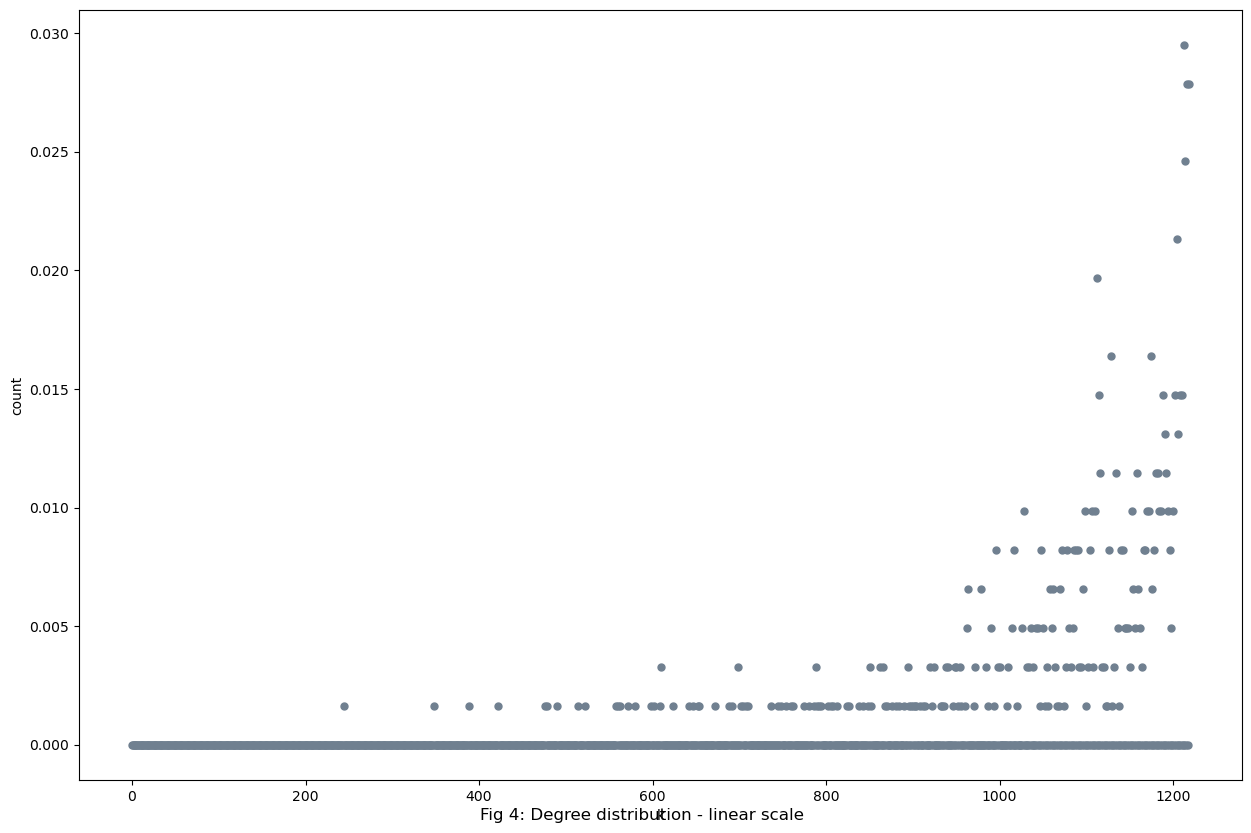

In [22]:
plot_d(Dig_grapgh, scale = 'linear')

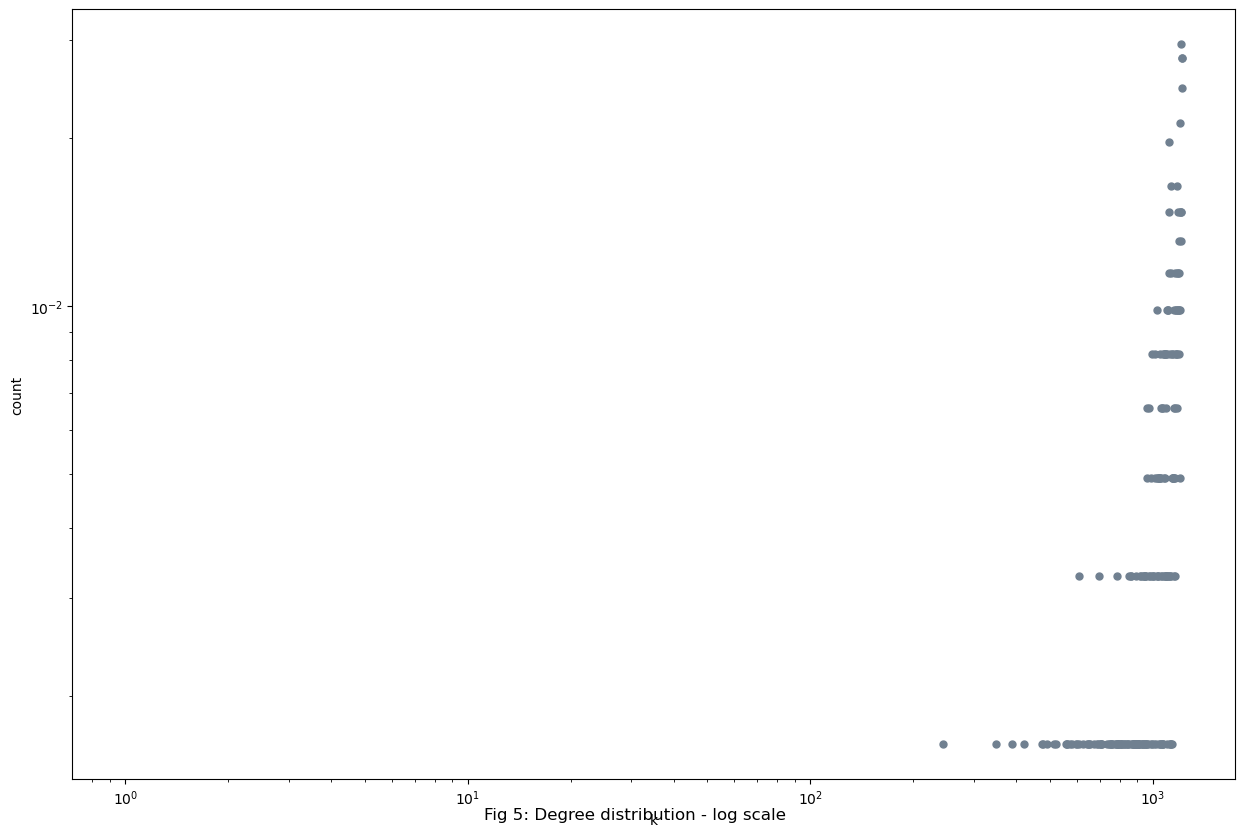

In [23]:
plot_d(Dig_grapgh, scale = 'log')

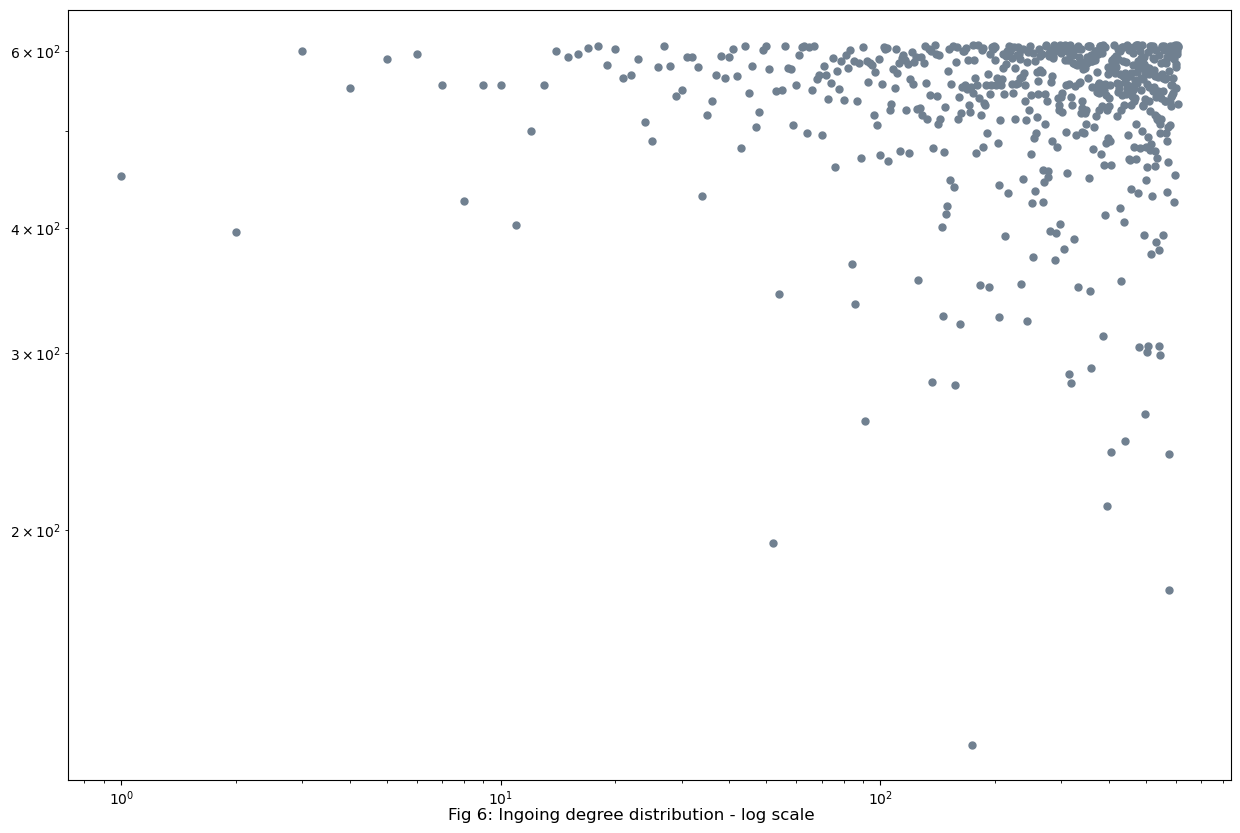

In [24]:
# Create the ingoing degree distributions
indegrees = pd.DataFrame(Dig_grapgh.in_degree(), columns=['Node', 'Degree'])
indegreeslog = [Dig_grapgh.in_degree(n) for n in Dig_grapgh.nodes()]
plt.xscale('log')
plt.yscale('log')
plt.plot(indegrees['Degree'], linewidth = 0, marker = '.', markersize = 10, color = 'slategrey')
plt.figtext(0.5, 0.07,'Fig 6: Ingoing degree distribution - log scale', wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

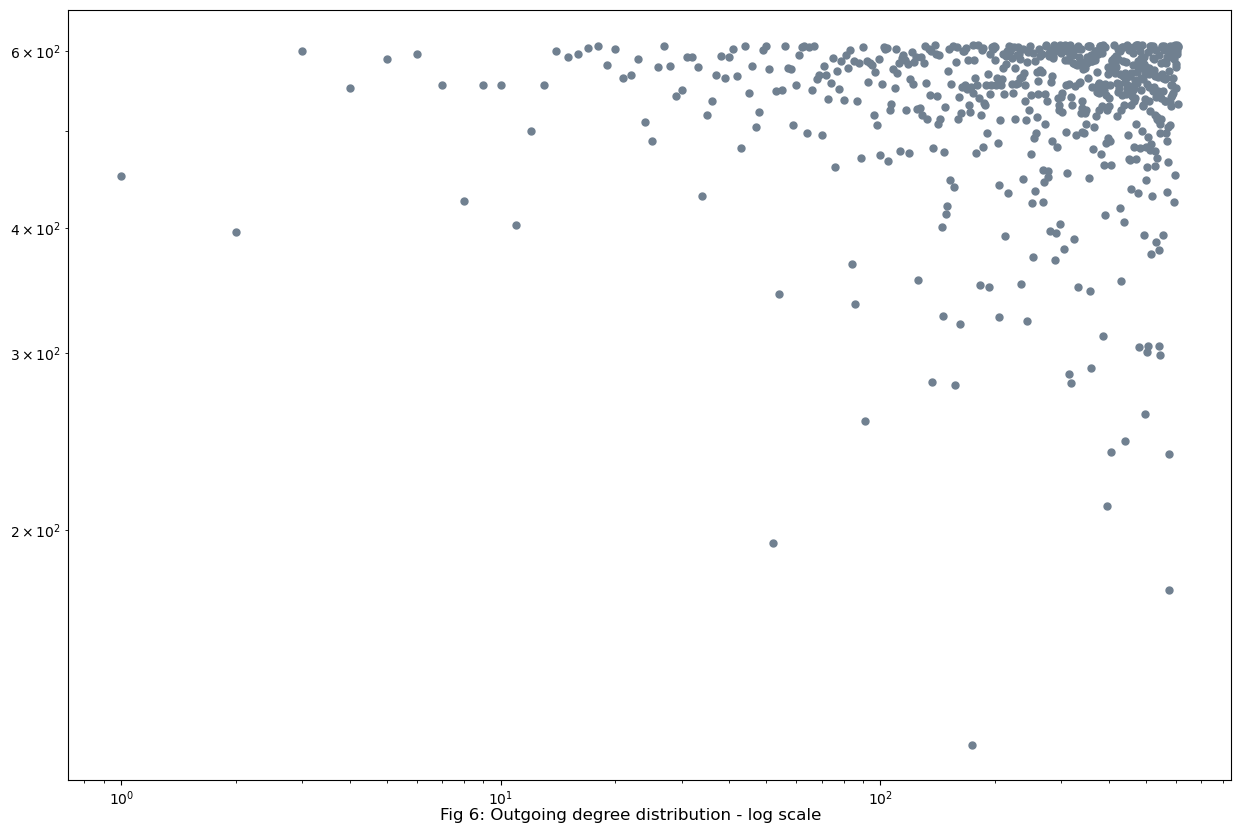

In [25]:
# Creating the outgoing degree distributions
outdegrees = pd.DataFrame(Dig_grapgh.out_degree(), columns=['Node', 'Degree'])
outdegreeslog = [Dig_grapgh.out_degree(n) for n in Dig_grapgh.nodes()]
plt.xscale('log')
plt.yscale('log')
plt.plot(outdegrees['Degree'], linewidth = 0, marker = '.', markersize = 10, color = 'slategrey')
plt.figtext(0.5, 0.07,'Fig 6: Outgoing degree distribution - log scale', wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [26]:
# Estimate the slope of the incoming degree distribtion
deg = {}

for x in list(Dig_grapgh.nodes()):
    key = len(list(Dig_grapgh.neighbors(x)))
    deg[key] = deg.get(key, 0) + 1

max_deg = max(deg.keys(), key=int)

degrees = []

for y in range(1, max_deg + 1):
    degrees.append(deg.get(y, 0))

fit = powerlaw.Fit(degrees)
print("Estimation of the slope of the incoming degree distribution:")
print(fit.power_law.alpha)

Estimation of the slope of the incoming degree distribution:
4.009841680339939


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
E:\Software-Installed\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
